## División de cursos mediante Algoritmos Genéticos

 **Contexto:**
**Contexto:**
En una escuela secundaria, 60 alumnos pasaron exitosamente el curso de ingreso.Ahora deben ser asignados a 3 cursos de 20 alumnos cada uno. Cada alumno eligió dos compañeros con quienes le gustaría estar en el mismo curso.


**Objetivo:**
Construir una asignacion que maximice la utilidad total del grupo.

**Reglas:**
- Cada curso debe tener exactamente 20 alumnos.
- Cada alumno debe pertenecer a un único curso.
- No pueden quedar cursos con más ni menos de 20 alumnos.

**Definiciones de utilidad (fitness):**
- +1 punto por cada amigo elegido que este en el mismo curso (Osea + 2 si los 2 amigos están en el mismo curso)
- -3 puntos si los dos amigos terminan juntos en otro curso.
- -1 punto si el alumno y sus dos amigos terminan todos en cursos distintos.

In [ ]:
# Listado de alumnos y sus preferencias
alumnos_amigos = {
    'Ana': ['Bruno', 'Camila'], 'Bruno': ['Ana', 'Diego'], 'Camila': ['Bruno', 'Elena'],
    'Diego': ['Camila', 'Francisco'], 'Elena': ['Diego', 'Gabriela'], 'Francisco': ['Elena', 'Hugo'],
    'Gabriela': ['Francisco', 'Isabel'], 'Hugo': ['Gabriela', 'Juan'], 'Isabel': ['Hugo', 'Karla'],
    'Juan': ['Isabel', 'Leonardo'], 'Karla': ['Juan', 'Mariana'], 'Leonardo': ['Karla', 'Nicolas'],
    'Mariana': ['Leonardo', 'Olivia'], 'Nicolas': ['Mariana', 'Pablo'], 'Olivia': ['Nicolas', 'Raul'],
    'Pablo': ['Olivia', 'Sofia'], 'Raul': ['Pablo', 'Tomas'], 'Sofia': ['Raul', 'Ursula'],
    'Tomas': ['Sofia', 'Valeria'], 'Ursula': ['Tomas', 'Walter'], 'Valeria': ['Ursula', 'Xavier'],
    'Walter': ['Valeria', 'Yara'], 'Xavier': ['Walter', 'Zoe'], 'Yara': ['Xavier', 'Andres'],
    'Zoe': ['Yara', 'Belen'], 'Andres': ['Zoe', 'Carlos'], 'Belen': ['Andres', 'Daniela'],
    'Carlos': ['Belen', 'Esteban'], 'Daniela': ['Carlos', 'Fernanda'], 'Esteban': ['Daniela', 'Gustavo'],
    'Fernanda': ['Esteban', 'Helena'], 'Gustavo': ['Fernanda', 'Ignacio'], 'Helena': ['Gustavo', 'Julieta'],
    'Ignacio': ['Helena', 'Kevin'], 'Julieta': ['Ignacio', 'Laura'], 'Kevin': ['Julieta', 'Mateo'],
    'Laura': ['Kevin', 'Natalia'], 'Mateo': ['Laura', 'Octavio'], 'Natalia': ['Mateo', 'Paula'],
    'Octavio': ['Natalia', 'Ricardo'], 'Paula': ['Octavio', 'Sabrina'], 'Ricardo': ['Paula', 'Tadeo'],
    'Sabrina': ['Ricardo', 'Ursula'], 'Tadeo': ['Sabrina', 'Victor'], 'Victor': ['Ursula', 'Ximena'],
    'Wanda': ['Victor', 'Yamila'], 'Ximena': ['Wanda', 'Zoe'], 'Yamila': ['Ximena', 'Ana'], 'Zoe': ['Yamila', 'Bruno'],
    'Beltran': ['Ana', 'Diego'], 'Catalina': ['Francisco', 'Gabriela'], 'Dario': ['Hugo', 'Isabel'],
    'Emilia': ['Leonardo', 'Mariana'], 'Fabian': ['Nicolas', 'Olivia'], 'Gisela': ['Pablo', 'Raul'],
    'Hernan': ['Sofia', 'Valeria'], 'Isidoro': ['Walter', 'Xavier'], 'Jimena': ['Yara', 'Andres'],
    'Horacio': ['Belen', 'Carlos'], 'Luz': ['Daniela', 'Esteban'], 'Martin': ['Fernanda', 'Gustavo']
}

**Entregables:**
- 1. Código en Python con comentarios.
- 2. Breve descripción sobre cómo definieron el genoma, la funcion de aptitud, el tamaño de la población inicial, la tasa de mutación y por qué eligieron un determinado método de selección de padres.
- 3. División de cursos que maximiza la utilidad total y valor de esa utilidad total.

**Bonus 1 (opcional):**
Implementar elitismo:
- Guardar el mejor individuo en cada generación y pasarlo directamente sin modificaciones.

**Bonus 2 (opcional):**
Por motivos personales los alumnos Xavier y Zoe deben compartir curso si o si con sus dos amigos (Walter y Zoe y Yara y Belen). Modifica el código para garantizar esto.

In [ ]:
#Importo Bibliotecas que voy a utilizar
import pandas as pd
import numpy as np
import random
import copy
import matplotlib.pyplot as plt

#### Entregable

In [ ]:
#Genoma - Representamos cada individuo como un diccionario que asigna cada alumno a uno de los cursos (1, 2 o 3).
ejemplo_genoma = {'Ana':1, 'Bruno':2, 'Camila':3, 'Diego': 1}

# Función para inicializar la población
# Crea "tamano_poblacion" individuos válidos (cada curso con 20 alumnos)
def inicializar_poblacion(tamano_poblacion):
  # esta seleccionado al azar un indidivudo y lo suma al curso 1 hasta llegar a 20.
    alumnos = list(alumnos_amigos.keys())
    poblacion = []
    for _ in range(tamano_poblacion):
        random.shuffle(alumnos)
        individuo = {}
        for idx, alumno in enumerate(alumnos):
          # el idx // 20 me da 0 hasta que idx sea 20 y ahí me da 1
            curso = (idx // 20) + 1
            individuo[alumno] = curso
        poblacion.append(individuo)
    return poblacion

In [ ]:
#Función de aptitud
#Se maximiza cumpliendo que cada alumno este junto a sus amigos;
#penaliza separaciones y situaciones donde los amigos quedan juntos sin el alumno
def fitness_individual(alumno, individuo):
    amigos = alumnos_amigos[alumno]
    cursos_amigos = [individuo[amigo] for amigo in amigos]
    curso_alumno = individuo[alumno]
    mismo_curso = sum([1 for curso in cursos_amigos if curso == curso_alumno])
    if mismo_curso == 2:
        return 2
    elif mismo_curso == 1:
        return 1
    else:
        if cursos_amigos[0] == cursos_amigos[1] and cursos_amigos[0] != curso_alumno:
            return -3
        else:
            return -1

def calcular_fitness(individuo):
    fitness = 0
    for alumno, amigos in alumnos_amigos.items():
        fitness += fitness_individual(alumno, individuo)
    return fitness

In [ ]:
# Selección de padres - Método Aceptar-Rechazar
def seleccionar_accept_reject(poblacion):
    max_fitness = max(calcular_fitness(ind) for ind in poblacion)
    while True:
        candidato = random.choice(poblacion)
        if random.uniform(0, max_fitness) < calcular_fitness(candidato):
            return candidato

In [ ]:
#Cross-Over Single-Point que garantiza que cada curso siempre tenga 20 alumnos
def crossover(padre1, padre2):
    alumnos = sorted(alumnos_amigos.keys())  # Lista de alumnos ordenados alfabéticamente
    punto_corte = random.randint(1, len(alumnos) - 1)  # Elegimos un punto de corte aleatorio
    hijo = {}

    # Construimos el hijo mezclando padre1 y padre2 según el punto de corte
    for i, alumno in enumerate(alumnos):
        if i < punto_corte:
            hijo[alumno] = padre1[alumno]  # Antes del corte: asignación del padre1
        else:
            hijo[alumno] = padre2[alumno]  # Después del corte: asignación del padre2

    # Ahora balanceamos: aseguramos que haya 20 alumnos en cada curso
    cursos = {1: [], 2: [], 3: []}  # Diccionario para agrupar alumnos por curso
    for alumno, curso in hijo.items():
        cursos[curso].append(alumno)  # Agrupamos alumnos según su curso asignado

    # Mientras haya cursos con más o menos de 20 alumnos
    while any(len(cursos[c]) != 20 for c in [1, 2, 3]):
        curso_exceso = next(c for c in [1, 2, 3] if len(cursos[c]) > 20)  # Buscamos un curso con más de 20
        curso_falta = next(c for c in [1, 2, 3] if len(cursos[c]) < 20)    # Buscamos un curso con menos de 20

        alumno_mover = random.choice(cursos[curso_exceso])  # Elegimos un alumno al azar del curso con exceso
        hijo[alumno_mover] = curso_falta  # Movemos al alumno al curso que tiene falta

        # Actualizamos las listas de cursos
        cursos[curso_exceso].remove(alumno_mover)
        cursos[curso_falta].append(alumno_mover)

    return hijo  # Devolvemos el hijo balanceado

In [ ]:
# Función de mutación
# Intercambia dos alumnos de cursos diferentes
def mutar(individuo):
    alumnos = list(individuo.keys())
    a1, a2 = random.sample(alumnos, 2)
    if individuo[a1] != individuo[a2]:
        individuo[a1], individuo[a2] = individuo[a2], individuo[a1]
    return individuo

In [ ]:
# Funcion principal del algoritmo genético
def algoritmo_genetico(tamano_poblacion, generaciones, tasa_mutacion):
    poblacion = inicializar_poblacion(tamano_poblacion)
    mejor_ever_individuo = max(poblacion, key=lambda x: calcular_fitness(x))
    mejor_ever_fitness = calcular_fitness(mejor_ever_individuo)
    evolucion_fitness = []

    for gen in range(generaciones):
        nueva_poblacion = []

        while len(nueva_poblacion) < tamano_poblacion:
            padre1 = seleccionar_accept_reject(poblacion)
            padre2 = seleccionar_accept_reject(poblacion)
            hijo = crossover(padre1, padre2)
            if random.random() < tasa_mutacion:
                hijo = mutar(hijo)
            nueva_poblacion.append(hijo)

        poblacion = nueva_poblacion
        mejor_individuo = max(poblacion, key=lambda x: calcular_fitness(x))
        fitness_generacion = calcular_fitness(mejor_individuo)
        evolucion_fitness.append(fitness_generacion)
        print(f"Generacion {gen+1}: Fitness maximo = {fitness_generacion}")

        if fitness_generacion > mejor_ever_fitness:
            mejor_ever_individuo = copy.deepcopy(mejor_individuo)
            mejor_ever_fitness = fitness_generacion

    return mejor_ever_individuo, evolucion_fitness

In [ ]:
# Definimos hiperparámetros
tamano_poblacion= 30
generaciones= 300
tasa_mutacion= 0.1

#Ejecutamos el algoritmo genético
mejor_solucion, evolucion_fitness = algoritmo_genetico(tamano_poblacion, generaciones, tasa_mutacion)

print("\nFitness total de la mejor asignación:", calcular_fitness(mejor_solucion))

print("\nDetalle del fitness individual:")
for alumno in sorted(mejor_solucion.keys()):
    curso = mejor_solucion[alumno]
    fit_ind = fitness_individual(alumno, mejor_solucion)
    print(f"{alumno} - Curso {curso} - Fitness individual: {fit_ind}")

cursos = {'Curso 1': [], 'Curso 2': [], 'Curso 3': []}
for alumno, curso in mejor_solucion.items():
    cursos[f"Curso {curso}"].append(alumno)

print("\nDistribucion final por cursos:")
for curso, alumnos in cursos.items():
    print(f"{curso}: {alumnos}")

Generacion 1: Fitness maximo = 16
Generacion 2: Fitness maximo = 23
Generacion 3: Fitness maximo = 23
Generacion 4: Fitness maximo = 25
Generacion 5: Fitness maximo = 35
Generacion 6: Fitness maximo = 27
Generacion 7: Fitness maximo = 28
Generacion 8: Fitness maximo = 26
Generacion 9: Fitness maximo = 24
Generacion 10: Fitness maximo = 32
Generacion 11: Fitness maximo = 32
Generacion 12: Fitness maximo = 27
Generacion 13: Fitness maximo = 33
Generacion 14: Fitness maximo = 32
Generacion 15: Fitness maximo = 31
Generacion 16: Fitness maximo = 36
Generacion 17: Fitness maximo = 35
Generacion 18: Fitness maximo = 32
Generacion 19: Fitness maximo = 37
Generacion 20: Fitness maximo = 35
Generacion 21: Fitness maximo = 34
Generacion 22: Fitness maximo = 42
Generacion 23: Fitness maximo = 48
Generacion 24: Fitness maximo = 48
Generacion 25: Fitness maximo = 51
Generacion 26: Fitness maximo = 51
Generacion 27: Fitness maximo = 47
Generacion 28: Fitness maximo = 45
Generacion 29: Fitness maximo

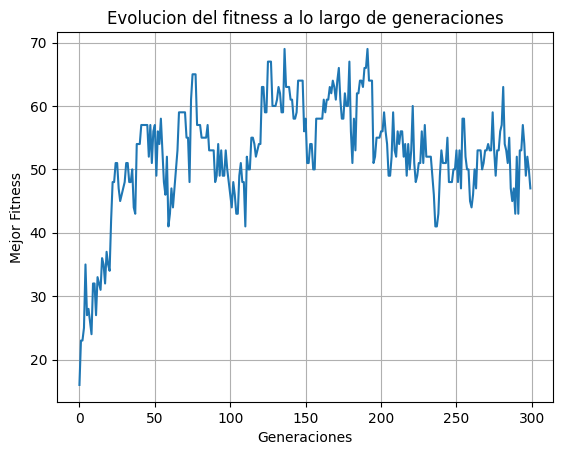

In [ ]:
#Graficamos la evolución del fitness
plt.plot(evolucion_fitness)
plt.xlabel('Generaciones')
plt.ylabel('Mejor Fitness')
plt.title('Evolucion del fitness a lo largo de generaciones')
plt.grid(True)
plt.show()

#### Bonus 1 - Aplicar elitismo

In [ ]:
# Lo único que debemos cambiar es la Funcion principal del algoritmo genético
def algoritmo_genetico_elitista(tamano_poblacion, generaciones, tasa_mutacion):
    poblacion = inicializar_poblacion(tamano_poblacion)
    #Guardamos el mejor individuo de cada población
    mejor_individuo = max(poblacion, key=lambda x: calcular_fitness(x))
    mejor_ever_individuo = max(poblacion, key=lambda x: calcular_fitness(x))
    mejor_ever_fitness = calcular_fitness(mejor_ever_individuo)
    evolucion_fitness = []

    for gen in range(generaciones):
        nueva_poblacion = []
        #Agregamos al mejor individuo a la nueva generación
        nueva_poblacion.append(copy.deepcopy(mejor_individuo))

        while len(nueva_poblacion) < tamano_poblacion:
            padre1 = seleccionar_accept_reject(poblacion)
            padre2 = seleccionar_accept_reject(poblacion)
            hijo = crossover(padre1, padre2)
            if random.random() < tasa_mutacion:
                hijo = mutar(hijo)
            nueva_poblacion.append(hijo)

        poblacion = nueva_poblacion
        mejor_individuo = max(poblacion, key=lambda x: calcular_fitness(x))
        fitness_generacion = calcular_fitness(mejor_individuo)
        evolucion_fitness.append(fitness_generacion)
        print(f"Generacion {gen+1}: Fitness maximo = {fitness_generacion}")

        if fitness_generacion > mejor_ever_fitness:
            mejor_ever_individuo = copy.deepcopy(mejor_individuo)
            mejor_ever_fitness = fitness_generacion

    return mejor_ever_individuo, evolucion_fitness

In [ ]:
# Definimos hiperparámetros
tamano_poblacion= 30
generaciones= 300
tasa_mutacion= 0.4 #Como mantenemos el mejor individuo podemos tener mutación más alta e intentar mejorar más rápido

#Ejecutamos el algoritmo genético
mejor_solucion, evolucion_fitness = algoritmo_genetico_elitista(tamano_poblacion, generaciones, tasa_mutacion)

print("\nFitness total de la mejor asignación:", calcular_fitness(mejor_solucion))

# Mostrar el fitness individual de cada alumno
print("\nDetalle del fitness individual:")
for alumno in sorted(mejor_solucion.keys()):
    curso = mejor_solucion[alumno]
    fit_ind = fitness_individual(alumno, mejor_solucion)
    print(f"{alumno} - Curso {curso} - Fitness individual: {fit_ind}")

# Crear y mostrar diccionario resumen por curso
cursos = {'Curso 1': [], 'Curso 2': [], 'Curso 3': []}
for alumno, curso in mejor_solucion.items():
    cursos[f"Curso {curso}"].append(alumno)

print("\nDistribucion final por cursos:")
for curso, alumnos in cursos.items():
    print(f"{curso}: {alumnos}")

Generacion 1: Fitness maximo = 21
Generacion 2: Fitness maximo = 21
Generacion 3: Fitness maximo = 24
Generacion 4: Fitness maximo = 30
Generacion 5: Fitness maximo = 30
Generacion 6: Fitness maximo = 30
Generacion 7: Fitness maximo = 31
Generacion 8: Fitness maximo = 39
Generacion 9: Fitness maximo = 39
Generacion 10: Fitness maximo = 45
Generacion 11: Fitness maximo = 45
Generacion 12: Fitness maximo = 45
Generacion 13: Fitness maximo = 49
Generacion 14: Fitness maximo = 49
Generacion 15: Fitness maximo = 49
Generacion 16: Fitness maximo = 49
Generacion 17: Fitness maximo = 49
Generacion 18: Fitness maximo = 51
Generacion 19: Fitness maximo = 51
Generacion 20: Fitness maximo = 51
Generacion 21: Fitness maximo = 51
Generacion 22: Fitness maximo = 51
Generacion 23: Fitness maximo = 51
Generacion 24: Fitness maximo = 51
Generacion 25: Fitness maximo = 51
Generacion 26: Fitness maximo = 51
Generacion 27: Fitness maximo = 51
Generacion 28: Fitness maximo = 56
Generacion 29: Fitness maximo

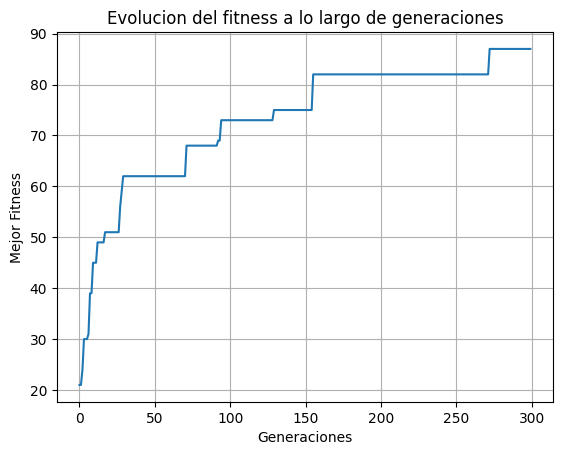

In [ ]:
#Graficamos la evolución del fitness
plt.plot(evolucion_fitness)
plt.xlabel('Generaciones')
plt.ylabel('Mejor Fitness')
plt.title('Evolucion del fitness a lo largo de generaciones')
plt.grid(True)
plt.show()

#### Bonus 2 - Caso especial para Xavier y Zoe - Xavier, Walter, Zoe, Yara y Belen juntos

In [ ]:
#Lo que debemos cambiar acá es la función de aptitud

#En esta agregamos la restricción y la penalizamos fuerte si no ocurre
def fitness_individual(alumno, individuo):
    amigos = alumnos_amigos[alumno]
    curso_alumno = individuo[alumno]
    cursos_amigos = [individuo[amigo] for amigo in amigos]
    mismo_curso = sum([1 for curso in cursos_amigos if curso == curso_alumno])

    #Nueva condición
    if alumno in ['Xavier', 'Zoe']:
        if mismo_curso < 2:
            return -30
        else:
            return 2
    #Las condiciones de antes
    else:
        if mismo_curso == 2:
            return 2
        elif mismo_curso == 1:
            return 1
        else:
            if cursos_amigos[0] == cursos_amigos[1] and cursos_amigos[0] != curso_alumno:
                return -3
            else:
                return -1

#Esta queda igual
def calcular_fitness(individuo):
    fitness = 0
    for alumno, amigos in alumnos_amigos.items():
        fitness += fitness_individual(alumno, individuo)
    return fitness

In [ ]:
#Como el caso de Zoe y Xavier aplica mucha penalización, es posible que el método de accept-reject no funcione acá
#Cambiamos al método torneo de selección de padres. Este método toma 3 individuos al azar y elige al que tiene mayor fitness
def seleccionar_torneo(poblacion, k=3):
    candidatos = random.sample(poblacion, k)
    candidatos.sort(key=lambda x: calcular_fitness(x), reverse=True)
    return candidatos[0]

In [ ]:
# Misma función que para bonus 1 pero cambiando el metodo de seleccion de padres
def algoritmo_genetico_elitista(tamano_poblacion, generaciones, tasa_mutacion):
    poblacion = inicializar_poblacion(tamano_poblacion)
    #Guardamos el mejor individuo de cada población
    #Elijo los mejores dos individuos de la poblacion
    mejor_individuo = max(poblacion, key=lambda x: calcular_fitness(x))
    mejor_ever_individuo = max(poblacion, key=lambda x: calcular_fitness(x))
    mejor_ever_fitness = calcular_fitness(mejor_ever_individuo)
    evolucion_fitness = []

    for gen in range(generaciones):
        nueva_poblacion = []
        #Agregamos al mejor individuo a la nueva generación
        nueva_poblacion.append(copy.deepcopy(mejor_individuo))

        while len(nueva_poblacion) < tamano_poblacion:
            padre1 = seleccionar_torneo(poblacion)
            padre2 = seleccionar_torneo(poblacion)
            hijo = crossover(padre1, padre2)
            if random.random() < tasa_mutacion:
                hijo = mutar(hijo)
            nueva_poblacion.append(hijo)

        poblacion = nueva_poblacion
        mejor_individuo = max(poblacion, key=lambda x: calcular_fitness(x))
        fitness_generacion = calcular_fitness(mejor_individuo)
        evolucion_fitness.append(fitness_generacion)
        print(f"Generacion {gen+1}: Fitness maximo = {fitness_generacion}")

        if fitness_generacion > mejor_ever_fitness:
            mejor_ever_individuo = copy.deepcopy(mejor_individuo)
            mejor_ever_fitness = fitness_generacion

    return mejor_ever_individuo, evolucion_fitness

In [ ]:
# Definimos hiperparámetros
tamano_poblacion= 30
generaciones= 300
tasa_mutacion= 0.4 #Como mantenemos el mejor individuo podemos tener mutación más alta e intentar mejorar más rápido

#Ejecutamos el algoritmo genético
mejor_solucion, evolucion_fitness = algoritmo_genetico_elitista(tamano_poblacion, generaciones, tasa_mutacion)

print("\nFitness total de la mejor asignación:", calcular_fitness(mejor_solucion))

# Mostrar el fitness individual de cada alumno
print("\nDetalle del fitness individual:")
for alumno in sorted(mejor_solucion.keys()):
    curso = mejor_solucion[alumno]
    fit_ind = fitness_individual(alumno, mejor_solucion)
    print(f"{alumno} - Curso {curso} - Fitness individual: {fit_ind}")

# Crear y mostrar diccionario resumen por curso
cursos = {'Curso 1': [], 'Curso 2': [], 'Curso 3': []}
for alumno, curso in mejor_solucion.items():
    cursos[f"Curso {curso}"].append(alumno)

print("\nDistribucion final por cursos:")
for curso, alumnos in cursos.items():
    print(f"{curso}: {alumnos}")

Generacion 1: Fitness maximo = -26
Generacion 2: Fitness maximo = -13
Generacion 3: Fitness maximo = -1
Generacion 4: Fitness maximo = -1
Generacion 5: Fitness maximo = -1
Generacion 6: Fitness maximo = -1
Generacion 7: Fitness maximo = 13
Generacion 8: Fitness maximo = 15
Generacion 9: Fitness maximo = 15
Generacion 10: Fitness maximo = 15
Generacion 11: Fitness maximo = 22
Generacion 12: Fitness maximo = 30
Generacion 13: Fitness maximo = 30
Generacion 14: Fitness maximo = 30
Generacion 15: Fitness maximo = 33
Generacion 16: Fitness maximo = 34
Generacion 17: Fitness maximo = 39
Generacion 18: Fitness maximo = 39
Generacion 19: Fitness maximo = 41
Generacion 20: Fitness maximo = 41
Generacion 21: Fitness maximo = 41
Generacion 22: Fitness maximo = 41
Generacion 23: Fitness maximo = 41
Generacion 24: Fitness maximo = 41
Generacion 25: Fitness maximo = 41
Generacion 26: Fitness maximo = 46
Generacion 27: Fitness maximo = 46
Generacion 28: Fitness maximo = 46
Generacion 29: Fitness maxi

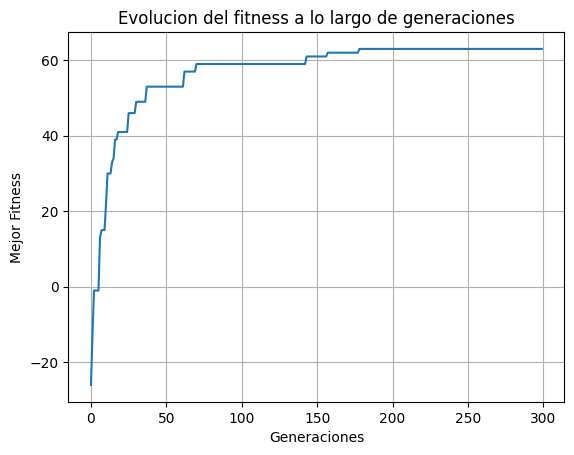

In [ ]:
#Graficamos la evolución del fitness
plt.plot(evolucion_fitness)
plt.xlabel('Generaciones')
plt.ylabel('Mejor Fitness')
plt.title('Evolucion del fitness a lo largo de generaciones')
plt.grid(True)
plt.show()